In [36]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt
#Named Entity Recognition
NER = spacy.load("en_core_web_sm")

In [2]:
!python -m spacy download en_core_web_sm

                                              0.0/12.8 MB ? eta -:--:--
     -                                        0.5/12.8 MB 9.4 MB/s eta 0:00:02
     --                                       0.9/12.8 MB 9.9 MB/s eta 0:00:02
     ----                                     1.5/12.8 MB 10.3 MB/s eta 0:00:02
     ------                                   2.0/12.8 MB 10.6 MB/s eta 0:00:02
     -------                                  2.5/12.8 MB 10.8 MB/s eta 0:00:01
     ---------                                3.1/12.8 MB 10.9 MB/s eta 0:00:01
     -----------                              3.6/12.8 MB 10.9 MB/s eta 0:00:01
     ------------                             4.1/12.8 MB 11.0 MB/s eta 0:00:01
     --------------                           4.7/12.8 MB 11.1 MB/s eta 0:00:01
     ----------------                         5.2/12.8 MB 11.1 MB/s eta 0:00:01
     -----------------                        5.7/12.8 MB 11.4 MB/s eta 0:00:01
     -------------------                      6.3/

In [3]:
import os

all_books = [b for b in os.scandir('data')if '.txt' in b.name]

In [4]:
all_books

[<DirEntry '1 The Last Wish.txt'>,
 <DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '8 something ends something begins.txt'>]

In [5]:
book = all_books[0]
book_text = open(book).read()
book_doc = NER(book_text)


In [6]:
displacy.render(book_doc[0:2000],style="ent",jupyter=True)

In [7]:
character_df = pd.read_csv('characters.csv')

In [8]:
import re
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [9]:
pd.set_option('display.max_rows', None)
character_df

Unnamed: 0                                               book  \
0              0                Category:Baptism of Fire characters   
1              1                Category:Baptism of Fire characters   
2              2                Category:Baptism of Fire characters   
3              3                Category:Baptism of Fire characters   
4              4                Category:Baptism of Fire characters   
5              5                Category:Baptism of Fire characters   
6              6                Category:Baptism of Fire characters   
7              7                Category:Baptism of Fire characters   
8              8                Category:Baptism of Fire characters   
9              9                Category:Baptism of Fire characters   
10            10                Category:Baptism of Fire characters   
11            11                Category:Baptism of Fire characters   
12            12                Category:Baptism of Fire characters   
13            13                Category:Baptism of Fire characters   
14            14                Category:Baptism of Fire characters   
15            15                Category:Baptism of Fire characters   
16            16                Category:Baptism of Fire characters   
17            17                Category:Baptism of Fire characters   
18            18                Category:Baptism of Fire characters   
19            19                Category:Baptism of Fire characters   
20            20                Category:Baptism of Fire characters   
21            21                Category:Baptism of Fire characters   
22            22                Category:Baptism of Fire characters   
23            23                Category:Baptism of Fire characters   
24            24                Category:Baptism of Fire characters   
25            25                Category:Baptism of Fire characters   
26            26                Category:Baptism of Fire characters   
27            27                Category:Baptism of Fire characters   
28            28                Category:Baptism of Fire characters   
29            29                Category:Baptism of Fire characters   
30            30                Category:Baptism of Fire characters   
31            31                Category:Baptism of Fire characters   
32            32                Category:Baptism of Fire characters   
33            33                Category:Baptism of Fire characters   
34            34                Category:Baptism of Fire characters   
35            35                Category:Baptism of Fire characters   
36            36                Category:Baptism of Fire characters   
37            37                Category:Baptism of Fire characters   
38            38                Category:Baptism of Fire characters   
39            39                Category:Baptism of Fire characters   
40            40                Category:Baptism of Fire characters   
41            41                Category:Baptism of Fire characters   
42            42                Category:Baptism of Fire characters   
43            43                Category:Baptism of Fire characters   
44            44                Category:Baptism of Fire characters   
45            45                Category:Baptism of Fire characters   
46            46                Category:Baptism of Fire characters   
47            47                Category:Baptism of Fire characters   
48            48                Category:Baptism of Fire characters   
49            49                Category:Baptism of Fire characters   
50            50                Category:Baptism of Fire characters   
51            51                Category:Baptism of Fire characters   
52            52                Category:Baptism of Fire characters   
53            53                Category:Baptism of Fire characters   
54            54                Category:Baptism of Fire characters   
55            55              

## Get named entity list per sentence

In [10]:
sent_entity_df = []

for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})

sent_entity_df = pd.DataFrame(sent_entity_df)

In [11]:
sent_entity_df

sentence  \
0     (ï»¿'Does, she, always, devour, her, victims, ...   
1     (Velerad, spat, vehemently, on, the, straw, .,...   
2     (', Come, on, ,, Geralt, ,, it, 'll, be, suppe...   
3                                             (Pish, !)   
4     (Devours, ,, takes, a, bite, ,, leaves, aside,...   
5     (She, only, bit, the, head, from, one, ,, gutt...   
6     (Damned, mother's-, !, ', \n\n, ', Careful, ,,...   
7     (', Say, what, you, want, about, the, striga, ...   
8     (', Has, anyone, she, 's, attacked, survived, ...   
9     (The, witcher, asked, ,, apparently, paying, n...   
10    (Segelin, and, Ostrit, looked, at, each, other...   
11           (', Yes, ,, ', said, the, bearded, man, .)   
12    (', At, the, very, beginning, ,, seven, years,...   
13                             (One, escaped-, ', \n\n)   
14    (And, then, ,, ', interrupted, Velerad, ,, ', ...   
15        (You, \n, remember, ., ., ., ?, ', \n\n \n\n)   
16    (IV, \n\n \n\n, The, following, day, ,, late, ...   
17    (He, was, led, in, by, a, soldier, in, a, hood...   
18    (The, conversation, did, not, yield, any, sign...   
19    (The, miller, was, terrified, ;, he, mumbled, ...   
20    (The, striga, could, open, her, \n, jaws, impr...   
21    (Her, claws, were, sharper, than, a, wildcat, ...   
22    (And, \n, it, was, only, because, of, that, th...   
23    (Having, finished, his, examination, Geralt, n...   
24    (The, soldier, pushed, the, peasant, through, ...   
25                 (It, was, Foltest, himself, ., \n\n)   
26    (', Sit, ,, do, not, get, up, ,, ', said, the,...   
27                  (', This, visit, is, unofficial, .)   
28           (Are, you, happy, with, the, interview, ?)   
29    (I, \n, heard, you, were, at, the, palace, thi...   
30               (', Yes, ,, your, Majesty, ., ', \n\n)   
31    (', When, will, you, set, about, your, task, ?...   
32    (', It, is, four, days, until, the, full, moon...   
33                            (After, that, ., ', \n\n)   
34    (', You, prefer, to, have, a, look, at, her, y...   
35                          (', There, is, no, need, .)   
36    (But, having, had, her, fill, the-, the, princ...   
37        (', Striga, ,, master, witcher, ,, striga, .)   
38               (Let, us, not, play, at, diplomacy, .)   
39      (She, will, be, a, princess, afterwards, ., \n)   
40    (And, that, is, what, I, have, come, to, talk,...   
41    (Answer, me, unofficially, ,, briefly, and, cl...   
42      (Do, n't, hide, behind, your, code, ., ', \n\n)   
43                 (Geralt, rubbed, his, brow, ., \n\n)   
44    (', I, confirm, ,, your, Majesty, ,, that, the...   
45    (And, ,, unless, I, am, mistaken, ,, it, can, ...   
46    (The, third, crowing, of, the, cock, ,, as, lo...   
47    (That, is, what, is, usually, done, with, \n, ...   
48                          (', So, simple, ?, ', \n\n)   
49                          (', It, is, not, simple, .)   
50       (First, you, have, to, survive, the, night, .)   
51    (Then, there, are, exceptions, to, the, rule, ...   
52                                   (Consecutively, .)   
53       (There, are, also, cases, which, are, ., ., .)   
54                                  (well, ., ., ., \n)   
55                               (hopeless, ., ', \n\n)   
56                    (Yes, ,, ', Foltest, bristled, .)   
57    (', I, keep, hearing, that, from, some, people...   
58    (Kill, the, monster, because, it, 's, an, \n, ...   
59    (Master, witcher, ,, I, \n\n, am, sure, they, ...   
60                                    (Am, I, right, ?)   
61    (Hack, the, man, -, eater, to, death, without,...   
62     (I, wo, n't, pay, ,, but, \n\n\n, they, will, .)   
63                                (Very, convenient, .)   
64                                      (And, cheap, .)   
65    (Because, the, king, will, order, the, witcher...   
66    (', The, king, unconditionally, orders, the, w...   
67                          (Geralt

In [20]:
def filter_entity(ent_list,character_df):
    return [ent for ent in ent_list
            if ent in list(character_df.character)
            or ent in list(character_df.character_firstname)]

In [25]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)



sentence  \
1   (Velerad, spat, vehemently, on, the, straw, .,...   
2   (', Come, on, ,, Geralt, ,, it, 'll, be, suppe...   
6   (Damned, mother's-, !, ', \n\n, ', Careful, ,,...   
7   (', Say, what, you, want, about, the, striga, ...   
10  (Segelin, and, Ostrit, looked, at, each, other...   
14  (And, then, ,, ', interrupted, Velerad, ,, ', ...   
23  (Having, finished, his, examination, Geralt, n...   
25               (It, was, Foltest, himself, ., \n\n)   
43               (Geralt, rubbed, his, brow, ., \n\n)   
67                        (Geralt, grimaced, ., \n\n)   

                      entities  charcter_entities character_entities  
1                    [Velerad]          [Velerad]          [Velerad]  
2                     [Geralt]           [Geralt]           [Geralt]  
6   [Careful, Velerad, Ostrit]  [Velerad, Ostrit]  [Velerad, Ostrit]  
7                       [Adda]             [Adda]             [Adda]  
10           [Segelin, Ostrit]  [Segelin, Ostrit]  [Segelin, Ostrit]  
14                   [Velerad]          [Velerad]          [Velerad]  
23            [Geralt, miller]           [Geralt]           [Geralt]  
25                   [Foltest]          [Foltest]          [Foltest]  
43                    [Geralt]           [Geralt]           [Geralt]  
67                    [Geralt]           [Geralt]           [Geralt]

In [26]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

C:\Users\Mourad\AppData\Local\Temp\ipykernel_34468\364234938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [29]:
sent_entity_df_filtered

sentence  \
1     (Velerad, spat, vehemently, on, the, straw, .,...   
2     (', Come, on, ,, Geralt, ,, it, 'll, be, suppe...   
6     (Damned, mother's-, !, ', \n\n, ', Careful, ,,...   
7     (', Say, what, you, want, about, the, striga, ...   
10    (Segelin, and, Ostrit, looked, at, each, other...   
14    (And, then, ,, ', interrupted, Velerad, ,, ', ...   
23    (Having, finished, his, examination, Geralt, n...   
25                 (It, was, Foltest, himself, ., \n\n)   
43                 (Geralt, rubbed, his, brow, ., \n\n)   
67                          (Geralt, grimaced, ., \n\n)   
68    (Foltest, looked, the, Rivian, in, the, eyes, ...   
72             (Geralt, was, silent, for, a, moment, .)   
77                                (Foltest, got, up, .)   
108                      (Geralt, was, silent, ., \n\n)   
114                    (Foltest, grew, gloomy, ., \n\n)   
115   (', I, do, not, think, it, will, come, to, tha...   
133                         (Foltest, grew, pensive, .)   
146                                   (', Geralt, ., ')   
147   (For, the, first, time, Foltest, called, the, ...   
148   (', Yes, ., ', \n\n, ', How, much, truth, is, ...   
154                                     (Geralt, ?, \n)   
166   (he, asked, ,, not, looking, at, Geralt, ., \n\n)   
170                 (Do, you, know, what, ,, Geralt, ?)   
173         (Foltest, turned, ,, his, eyes, glinted, .)   
183   (Foltest, turned, away, ,, started, towards, t...   
184   (For, a, moment, Geralt, thought, he, would, l...   
193                  (Geralt, did, not, reply, ., \n\n)   
197   (He, did, n't, confirm, it, ,, did, n't, nod, ...   
216   (Geralt, whispered, an, incantation, and, dran...   
224   (For, anyone, who, was, not, ,, like, \n, Gera...   
229   (Geralt, threw, his, sword, across, his, back,...   
231   (The, man, ,, Ostrit, ,, backed, away, abruptl...   
234   (But, the, mixture, enables, one, to, see, in,...   
235       (Ostrit, quickly, regained, control, ., \n\n)   
244   (Ostrit, hefted, a, sizeable, purse, in, his, ...   
249                     (Ostrit, raised, his, voice, .)   
255   (I, am, not, in, league, with, Velerad, and, S...   
265   (', Now, ,, that, ,, ', Ostrit, raised, his, h...   
267   (', It, will, be, easier, to, remove, Foltest,...   
276   (Ostrit, yelled, furiously, ,, placing, his, h...   
282   (Who, bends, double, to, Foltest, and, behind,...   
290   (', You, 'd, better, leave, ,, Lord, Ostrit, ,...   
292   (Ostrit, took, a, step, back, ,, drew, his, sw...   
297                                 (Geralt, smiled, .)   
299   (But, the, \n, witcher, was, not, going, to, l...   
303   (He, did, not, see, Geralt, standing, right, b...   
312                  (Ostrit, panted, heavily, ., \n\n)   
318   (But, not, now, ., ', \n\n, ', You, scoundrel,...   
320   (', Yes, ., ', \n\n, Ostrit, did, n't, say, an...   
323   (', It, 's, true, that, I, wanted, to, overthr...   
328                 (Geralt, remained, silent, ., \n\n)   
329                              (', I, loved, Adda, .)   
360   (', No, ., ', \n\n, Ostrit, did, not, hear, th...   
362         (Ostrit, did, not, wait, for, the, word, .)   
366   (Geralt, ,, \n, prudently, behind, the, stairc...   
369   (The, witcher, could, n't, make, out, exactly,...   
374   (He, knew, that, the, striga, ,, although, wel...   
386   (The, striga, stood, motionless, ,, her, gaze,...   
389   (Geralt, jumped, to, the, side, ,, spun, a, sw...   
391   (She, did, n't, lose, her, balance, and, attac...   
401   (Geralt, backed, away, and, ,, carefully, plac...   
407   (Geralt, was, content, \n, -, if, he, wanted, ...   
410   (Geralt, moved, to, a, safer, distance, and, ,...   
414   (Geralt, waited, calmly, and, ,, \n, with, his...   
419                           (Geralt, grew, uneasy, .)   
425   (To, gain, time, Geralt, jumped, on, to, the, ...   
431   (Geralt, ,, feeling, fury, \n, building, insid...   
435                                

In [28]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})



In [30]:
relationship_df = pd.DataFrame(relationships)

In [31]:
pd.set_option('display.max_rows', None)
relationship_df

source       target
0         Velerad       Geralt
1         Velerad       Geralt
2          Geralt      Velerad
3         Velerad       Ostrit
4          Geralt      Velerad
5         Velerad       Ostrit
6          Ostrit         Adda
7         Velerad       Ostrit
8          Ostrit         Adda
9         Velerad       Ostrit
10         Ostrit         Adda
11        Velerad       Ostrit
12         Ostrit         Adda
13           Adda      Segelin
14        Segelin       Ostrit
15        Velerad       Ostrit
16         Ostrit         Adda
17           Adda      Segelin
18        Segelin       Ostrit
19           Adda      Segelin
20        Segelin       Ostrit
21        Segelin       Ostrit
22        Segelin       Ostrit
23         Ostrit      Velerad
24        Segelin       Ostrit
25         Ostrit      Velerad
26         Geralt      Foltest
27         Geralt      Foltest
28         Geralt      Foltest
29         Geralt      Foltest
30         Geralt      Foltest
31         Geralt      Foltest
32         Geralt      Foltest
33         Geralt      Foltest
34         Geralt      Foltest
35        Foltest       Geralt
36        Foltest       Geralt
37         Geralt      Foltest
38        Foltest       Geralt
39        Foltest       Geralt
40        Foltest       Geralt
41        Foltest       Geralt
42        Foltest       Geralt
43         Geralt      Foltest
44         Geralt      Foltest
45        Foltest         Adda
46         Geralt      Foltest
47        Foltest         Adda
48         Geralt      Foltest
49        Foltest         Adda
50         Geralt      Foltest
51        Foltest         Adda
52        Foltest         Adda
53         Geralt      Foltest
54         Geralt      Foltest
55         Geralt      Foltest
56        Foltest       Geralt
57        Foltest       Geralt
58        Foltest       Geralt
59        Foltest       Geralt
60        Foltest       Geralt
61         Geralt      Foltest
62         Geralt      Foltest
63         Geralt       Ostrit
64         Geralt       Ostrit
65         Geralt       Ostrit
66         Geralt       Ostrit
67         Ostrit       Geralt
68         Ostrit       Geralt
69         Geralt       Ostrit
70         Ostrit       Geralt
71         Geralt       Ostrit
72         Geralt       Ostrit
73         Geralt       Ostrit
74         Geralt       Ostrit
75         Ostrit       Geralt
76         Ostrit       Geralt
77         Ostrit       Geralt
78         Ostrit       Geralt
79         Ostrit       Geralt
80         Ostrit       Geralt
81         Geralt       Ostrit
82        Velerad      Segelin
83        Velerad      Segelin
84        Velerad      Segelin
85        Velerad      Segelin
86        Velerad      Segelin
87        Velerad      Segelin
88         Ostrit      Foltest
89         Ostrit      Foltest
90         Ostrit      Foltest
91         Ostrit      Foltest
92        Foltest      Velerad
93        Foltest      Velerad
94        Foltest      Velerad
95        Foltest      Velerad
96        Foltest      Velerad
97        Foltest      Velerad
98         Ostrit       Geralt
99         Geralt       Ostrit
100        Geralt       Ostrit
101        Geralt       Ostrit
102        Geralt       Ostrit
103        Ostrit       Geralt
104        Ostrit       Geralt
105        Ostrit      Foltest
106        Ostrit      Foltest
107        Ostrit      Foltest
108       Foltest       Geralt
109        Geralt         Adda
110        Geralt         Adda
111        Geralt         Adda
112        Geralt         Adda
113        Geralt         Adda
114        Ostrit       Geralt
115        Geralt       Ostrit
116        Ostrit       Geralt
117        Geralt       Ostrit
118        Geralt       Ostrit
119        Geralt       Ostrit
120        Geralt       Ostrit
121        Geralt       Ostrit
122        Geralt         Adda
123        Geralt         Adda
124        Geralt         Adda
125          Adda       Geralt
126          Adda       Geralt
127       Foltest       Geralt
128       Fo

In [32]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [33]:
relationship_df.head(10)

source   target  value
0  Velerad   Geralt      7
1   Geralt  Velerad      3
2  Velerad   Ostrit      6
3   Ostrit     Adda      5
4     Adda  Segelin      3
5  Segelin   Ostrit      6
6   Ostrit  Velerad      2
7   Geralt  Foltest     20
8  Foltest   Geralt     18
9  Foltest     Adda      5

##Graph analysis and visualization

In [38]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

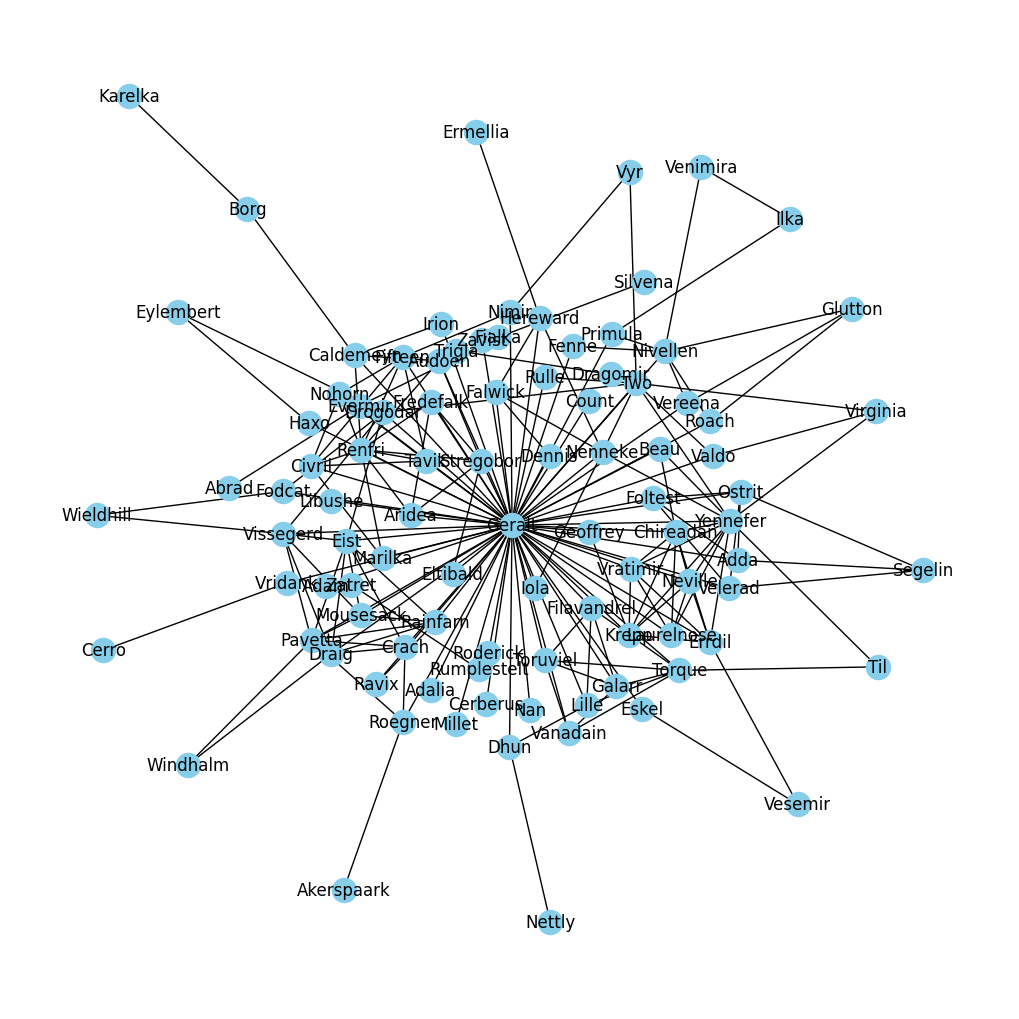

In [40]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [48]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")



witcher.html


In [49]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Velerad': 0.042105263157894736,
 'Geralt': 0.7368421052631579,
 'Ostrit': 0.05263157894736842,
 'Adda': 0.042105263157894736,
 'Segelin': 0.031578947368421054,
 'Foltest': 0.042105263157894736,
 'Nenneke': 0.06315789473684211,
 'Yennefer': 0.12631578947368421,
 'Roach': 0.031578947368421054,
 'Two': 0.08421052631578947,
 'Rulle': 0.021052631578947368,
 'Nivellen': 0.07368421052631578,
 'Glutton': 0.031578947368421054,
 'Fenne': 0.021052631578947368,
 'Primula': 0.031578947368421054,
 'Ilka': 0.021052631578947368,
 'Venimira': 0.021052631578947368,
 'Vereena': 0.031578947368421054,
 'Falwick': 0.042105263157894736,
 'Hereward': 0.042105263157894736,
 'Ermellia': 0.010526315789473684,
 'Dragomir': 0.010526315789473684,
 'Trigla': 0.010526315789473684,
 'Caldemeyn': 0.05263157894736842,
 'Karelka': 0.010526315789473684,
 'Borg': 0.021052631578947368,
 'Irion': 0.021052631578947368,
 'Stregobor': 0.06315789473684211,
 'Zavist': 0.010526315789473684,
 'Eltibald': 0.021052631578947368,
 'S

<Axes: >

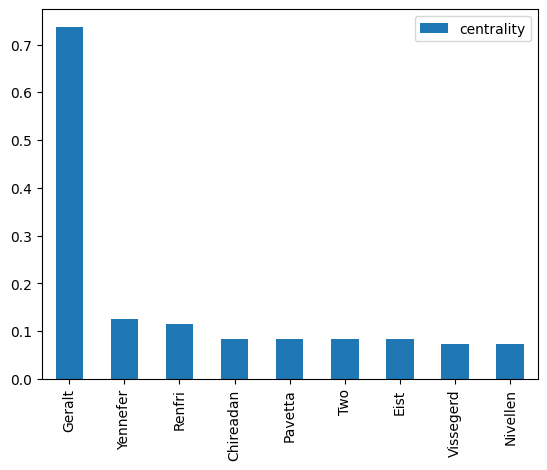

In [50]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

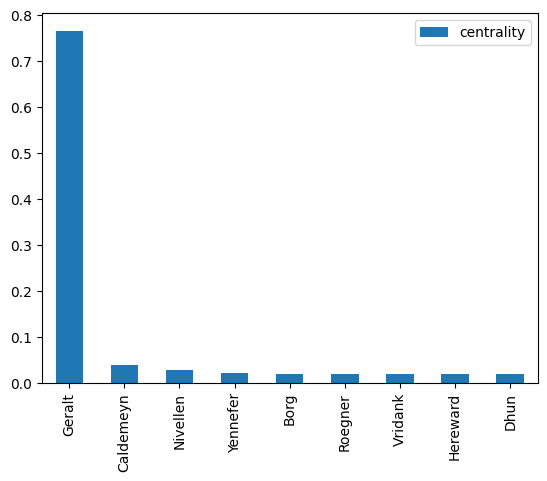

In [51]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")